In [2]:
import numpy as np
import SanskritCharts as sc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as mfm
import MatplotlibKeyMap as mk
import os
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re
import networkx as nx 
import matplotlib

In [2]:
sentences = []
df_words = pd.DataFrame(columns=['word', 'frequency'])
df_monograms = pd.DataFrame(columns=['monogram', 'frequency'])
df_digrams = pd.DataFrame(columns=['digram', 'frequency'])
df_triagrams = pd.DataFrame(columns=['triagram', 'frequency'])
df_endings = pd.DataFrame(columns=['ending', 'frequency'])
df_vyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_matra = pd.DataFrame(columns=['matra', 'frequency'])
df_halfLetters = pd.DataFrame(columns=['halfLetter', 'frequency'])
df_swar = pd.DataFrame(columns=['swar', 'frequency'])

In [3]:
print(sc.vyanjans)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']


In [4]:
print(sc.swars)

['अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः', 'ऋ', 'ऽ']


In [5]:
vyanjanCol = np.array(sc.vyanjans)
vyanjanFreq = np.zeros(len(vyanjanCol), dtype=float)

df_vyanjan['vyanjan'] = vyanjanCol
df_vyanjan['frequency'] = vyanjanFreq

print(df_vyanjan)

   vyanjan  frequency
0        क        0.0
1        ख        0.0
2        ग        0.0
3        घ        0.0
4        ङ        0.0
5        च        0.0
6        छ        0.0
7        ज        0.0
8        झ        0.0
9        ञ        0.0
10       ट        0.0
11       ठ        0.0
12       ड        0.0
13       ढ        0.0
14       ण        0.0
15       त        0.0
16       थ        0.0
17       द        0.0
18       ध        0.0
19       न        0.0
20       प        0.0
21       फ        0.0
22       ब        0.0
23       भ        0.0
24       म        0.0
25       य        0.0
26       र        0.0
27       ल        0.0
28       व        0.0
29       श        0.0
30       ष        0.0
31       स        0.0
32       ह        0.0


In [6]:
matraCol = np.array(sc.matras)
matraFreq = np.zeros(len(matraCol), dtype=float)

df_matra['matra'] = matraCol
df_matra['frequency'] = matraFreq

print(df_matra)



   matra  frequency
0      ा        0.0
1      ि        0.0
2      ी        0.0
3      ु        0.0
4      ू        0.0
5      े        0.0
6      ै        0.0
7      ो        0.0
8      ौ        0.0
9      ं        0.0
10     ः        0.0
11     ँ        0.0
12     ृ        0.0


In [7]:
swarCol=np.array(sc.swars)
swarFreq=np.zeros(len(swarCol), dtype=float)

df_swar['swar']=swarCol
df_swar['frequency']=swarFreq

print(df_swar)

   swar  frequency
0     अ        0.0
1     आ        0.0
2     इ        0.0
3     ई        0.0
4     उ        0.0
5     ऊ        0.0
6     ए        0.0
7     ऐ        0.0
8     ओ        0.0
9     औ        0.0
10   अं        0.0
11   अः        0.0
12    ऋ        0.0
13    ऽ        0.0


In [8]:
def InsertOrIncrease(df, type,word):
    # print(f'Inserting {word} in {type}')
    for letter in word:
        if letter not in sc.vyanjans and letter not in sc.matras and letter not in sc.swars:
            # print(f'Letter {letter} not found in vyanjans, matras or swars')
            return
    if df[type].isin([word]).any():
        # print(f'Word {word} already exists')
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        # print(f'Word {word} does not exist')
        df.loc[len(df)] = [word, 1]

In [9]:
def generateCSV(df, name):
    df['probability']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(name, index=False)

In [10]:
def generateCSV_filePath(df, name, filePath):
    df['probability']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format
    if not os.path.exists(filePath):
        os.makedirs(filePath)
    df.to_csv(filePath+name, index=False)

In [11]:
filename='combined\combined'

In [12]:
with open(f'{filename}.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            df_vyanjan.loc[df_vyanjan['vyanjan'] == word[i], 'frequency'] += 1
            df_matra.loc[df_matra['matra'] == word[i], 'frequency'] += 1
            
            # if word[i] =='ः':
            #     print(f'ः detected in {word}')
            
            if word[i] in sc.swars:
                if word[i]=='अ' and i+1<len(word) and word[i+1]=='ं':
                    # print(f'अं detected in {word}')
                    df_swar.loc[df_swar['swar'] == 'अं', 'frequency'] += 1
                    continue
                elif word[i]=='अ' and i+1<len(word) and word[i+1]=='ः':
                    # print(f'अः detected in {word}')
                    df_swar.loc[df_swar['swar'] == 'अः', 'frequency'] += 1
                else:
                    df_swar.loc[df_swar['swar'] == word[i], 'frequency'] += 1
            if(word[i]=='्'):
                # print(f'Half letter {word[i-1]}{word[i]} detected in {word}')
                InsertOrIncrease(df_halfLetters, 'halfLetter',word[i-1]+word[i])
            
            
                            
        if len(word) ==1:
            InsertOrIncrease(df_monograms, 'monogram',word)
        
        if len(word) ==2:
            InsertOrIncrease(df_digrams, 'digram',word) 
            
        if len(word) ==3:
            InsertOrIncrease(df_triagrams, 'triagram',word)
        
        if word[-1]=='।':
            InsertOrIncrease(df_endings, 'ending',word[:-1])

if not os.path.exists(filename):
    os.makedirs(filename)
        
generateCSV(df_vyanjan, f'{filename}/vyanjan.csv')

generateCSV(df_matra, f'{filename}/matra.csv')

generateCSV(df_monograms, f'{filename}/monograms.csv')

generateCSV(df_digrams, f'{filename}/digrams.csv')

generateCSV(df_triagrams, f'{filename}/triagrams.csv')

generateCSV(df_endings, f'{filename}/endings.csv')

generateCSV(df_halfLetters, f'{filename}/halfLetters.csv')

generateCSV(df_swar, f'{filename}/swar.csv')


Number of words: 129060


In [13]:
uniqueWords = np.unique(words)
print(print(f'Number of unique words: {len(uniqueWords)}'))

Number of unique words: 67683
None


In [14]:
def PlotBarGraph(df, name):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()
    plt.title('Probability of occurence of different characters',fontsize=10)
    # print(arr)
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
        # print(f'{i} converted to {arr[i]}')
    # print(arr)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    ax.set_ylabel('Probability')

    sns.barplot(x=arr, y=df['probability'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    # print('Saving file to '+filename+'/'+name+'.png')
    plt.savefig(filename+'/'+name+'.png')

In [15]:

def PlotBarGraph_filePath(df,name,path, char, nextCharType):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()

    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]

    if nextCharType=='vyanjan':
        plt.title(f'Next vyanjan after ', loc='left',fontsize=12)
    elif nextCharType=='matra':
        plt.title(f'Next matra after ', loc='left',fontsize=12)
    elif nextCharType=='swar':
        plt.title(f'Next swar after ', loc='left',fontsize=12)
        
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    plt.title(mk.Vyanjanmap[char],loc='center', fontproperties=prop,fontsize=20)
    
    sns.barplot(x=arr, y=df['probability'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    ax.set_ylabel('Probability')
    
    if not os.path.exists(path):
        os.makedirs(path)

    plt.savefig(filename+'/'+path+name+'.png')

In [16]:
# Plot histogram of frequency of probablity on x axis and frequency of that probablity on y axis

def PlotHistogram(df, name):
    plt.figure()
    plt.title('Probability of occurence of '+name,fontsize=10)
    plt.hist(df['probability'], bins=100)
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.savefig(f'{filename}/FreqVsProb'+name+'.png')
    

In [17]:
def ScatterPlot(df, name,list):
    plt.figure()
    ax=plt.axes()
    arr = df[name].copy()
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
    plt.title(f'Dividing {name} into groups ',fontsize=10)
    plt.scatter(df[name], df['probability'],visible=False, s=10, c='r', marker="o", alpha=0.5)
    plt.xlabel(name)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    for i, txt in enumerate(arr):
        ax.annotate(txt, (df[name][i], df['probability'][i]),fontproperties=prop, fontsize=15)
    
    HorizontalLine = list
    
    for i in range(len(HorizontalLine)):
        plt.axhline(y=HorizontalLine[i], color='b', linestyle='-')
    
    
    
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15, visible=False)
    ax.set_ylabel('Probability')
    plt.ylabel('Probability')
    plt.savefig(f'{filename}/ScatterPlot'+name+'.png')

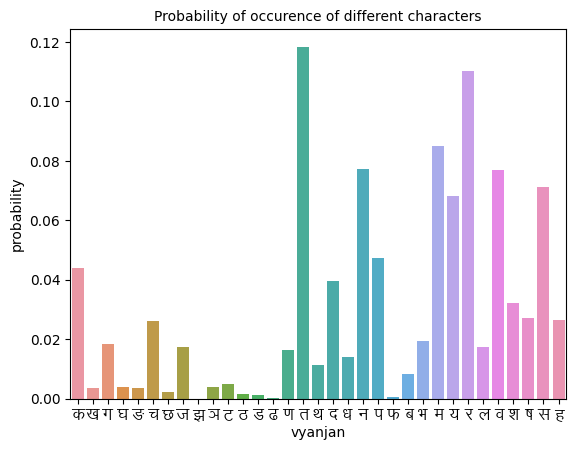

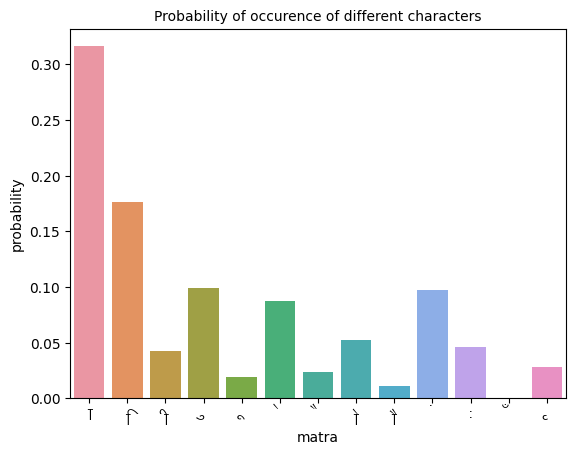

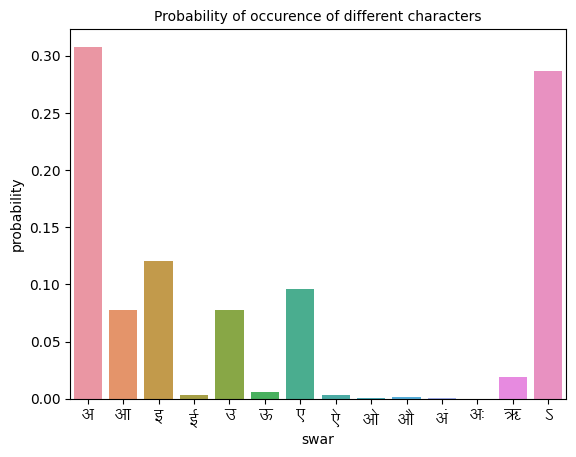

In [18]:
PlotBarGraph(df_vyanjan, 'vyanjan')
PlotBarGraph(df_matra, 'matra')

PlotBarGraph(df_swar, 'swar')

In [19]:
df_digrams_vyanjan = pd.DataFrame(columns=['digram','frequency'])
df_digrams_swar = pd.DataFrame(columns=['digram','frequency'])
df_digrams_matra = pd.DataFrame(columns=['digram','frequency'])

for word in words:
    for i in range(len(word)-1):
        if word[i] in sc.vyanjans:
            InsertOrIncrease(df_digrams_vyanjan, 'digram',word[i:i+2])
        elif word[i] in sc.swars:
            InsertOrIncrease(df_digrams_swar, 'digram',word[i:i+2])
        elif word[i] in sc.matras:
            InsertOrIncrease(df_digrams_matra, 'digram',word[i:i+2])
            



In [20]:
generateCSV(df_digrams_vyanjan, f'{filename}/digrams_vyanjan.csv')
generateCSV(df_digrams_swar, f'{filename}/digrams_swar.csv')
generateCSV(df_digrams_matra, f'{filename}/digrams_matra.csv')

In [21]:
df_trigrams_vyanjan = pd.DataFrame(columns=['trigram','frequency'])
df_trigrams_swar = pd.DataFrame(columns=['trigram','frequency'])
df_trigrams_matra = pd.DataFrame(columns=['trigram','frequency'])

for word in words:
    for i in range(len(word)-2):
        if word[i] in sc.vyanjans:
            InsertOrIncrease(df_trigrams_vyanjan, 'trigram',word[i:i+3])
        elif word[i] in sc.swars:
            InsertOrIncrease(df_trigrams_swar, 'trigram',word[i:i+3])
        elif word[i] in sc.matras:
            InsertOrIncrease(df_trigrams_matra, 'trigram',word[i:i+3])

In [22]:
generateCSV(df_trigrams_vyanjan, f'{filename}/trigrams_vyanjan.csv')
generateCSV(df_trigrams_swar, f'{filename}/trigrams_swar.csv')
generateCSV(df_trigrams_matra, f'{filename}/trigrams_matra.csv')

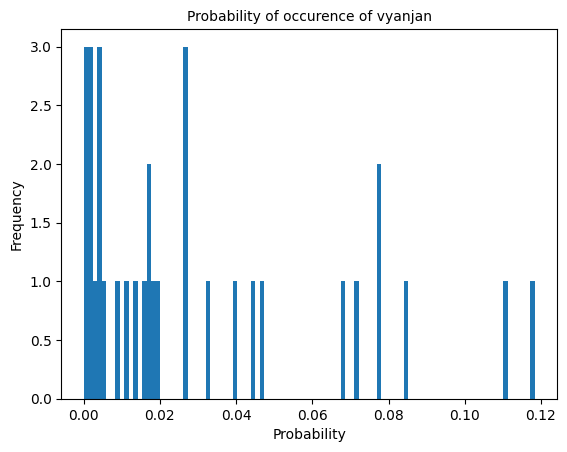

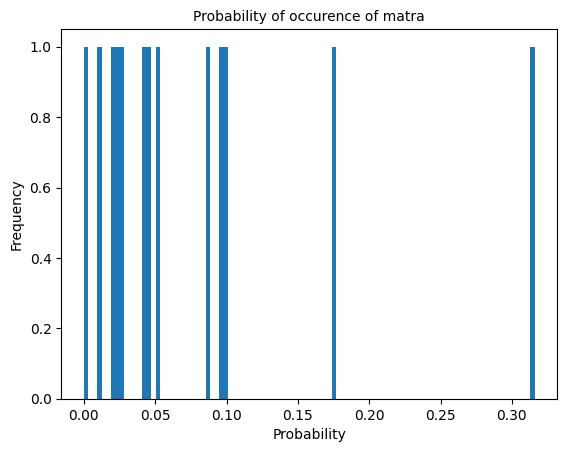

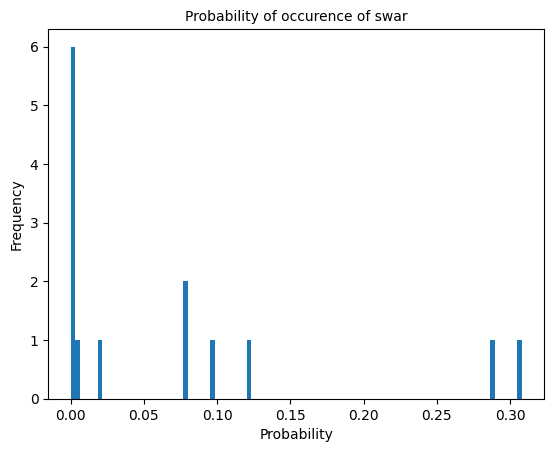

In [23]:
PlotHistogram(df_vyanjan, 'vyanjan')
PlotHistogram(df_matra, 'matra')
PlotHistogram(df_swar, 'swar')

C:\Users\rudra\AppData\Local\Temp\ipykernel_8220\1983377458.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(arr, fontproperties=prop, fontsize=15, visible=False)


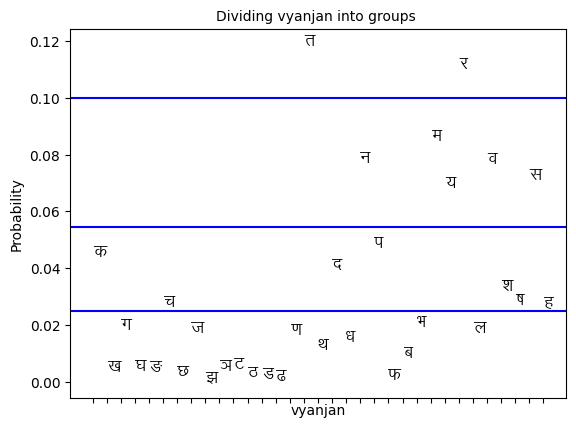

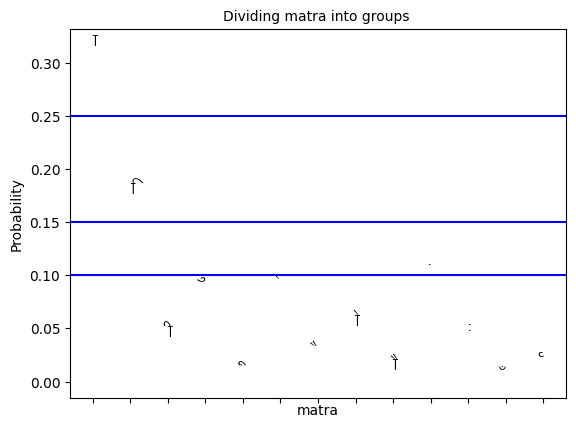

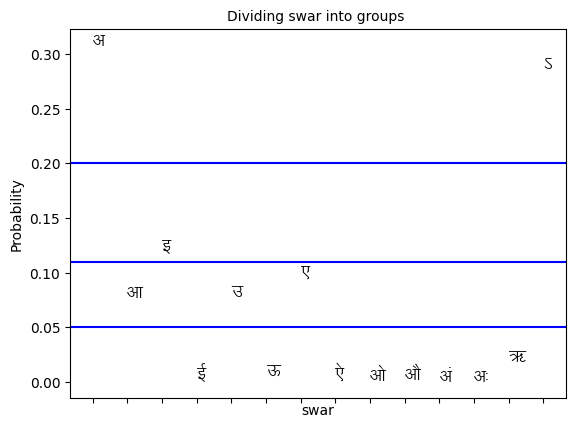

In [24]:
ScatterPlot(df_vyanjan, 'vyanjan',[0.10,0.0545,0.025])
ScatterPlot(df_matra, 'matra',[0.25,0.15,0.1])
ScatterPlot(df_swar, 'swar',[0.11,0.20,0.05])

In [25]:
queue = []

df_triagram_pattern = pd.DataFrame(columns=['pattern','frequency'])

patterns = ['VVV', 'VVM', 'VVS', 'VMV', 'VMM', 'VMS', 'VSV', 'VSM', 'VSS', 'MVV', 'MVM', 'MVS', 'MMV', 'MMM', 'MMS', 'MSV', 'MSM', 'MSS', 'SVV', 'SVM', 'SVS', 'SMV', 'SMM', 'SMS', 'SSV', 'SSM', 'SSS']

for i in range(len(patterns)):
    df_triagram_pattern.loc[len(df_triagram_pattern)] = [patterns[i], 0]

for word in words:
    queue = []
    for i in range(len(word)-2):
        if word[i] not in sc.vyanjans and word[i] not in sc.swars and word[i] not in sc.matras:
            queue=[]
        else:    
            if len(queue)<3:
                if word[i] in sc.vyanjans:
                    queue.append('V')
                elif word[i] in sc.swars:
                    queue.append('S')
                elif word[i] in sc.matras:
                    queue.append('M')
            else:    
                queue.pop(0)
                if word[i] in sc.vyanjans:
                    queue.append('V')
                elif word[i] in sc.swars:
                    queue.append('S')
                elif word[i] in sc.matras:
                    queue.append('M')
                if len(queue)==3:
                    pattern = queue[0]+queue[1]+queue[2]
                    InsertOrIncrease(df_triagram_pattern, 'pattern',pattern)
                    queue.pop(0)
        

# for i in range(len(words_str)-2):
#     if words_str[i] not in sc.vyanjans and words_str[i] not in sc.swars and words_str[i] not in sc.matras:
#         queue=[]
#     else:
#         if len(queue)<3:
#             if words_str[i] in sc.vyanjans:
#                 queue.append('V')
#             elif words_str[i] in dc.swars:
#                 queue.append('S')
#             elif words_str[i] in sc.matras:
#                 queue.append('M')
#         else:
#             queue.pop(0)
#             if words_str[i] in sc.vyanjans:
#                 queue.append('V')
#             elif words_str[i] in sc.swars:
#                 queue.append('S')
#             elif words_str[i] in sc.matras:
#                 queue.append('M')
                
        df_triagram_pattern.loc[df_triagram_pattern['pattern'] == ''.join(queue), 'frequency'] += 1


In [26]:
generateCSV(df_triagram_pattern, f'{filename}/triagram_pattern.csv')


<Figure size 2000x1000 with 0 Axes>

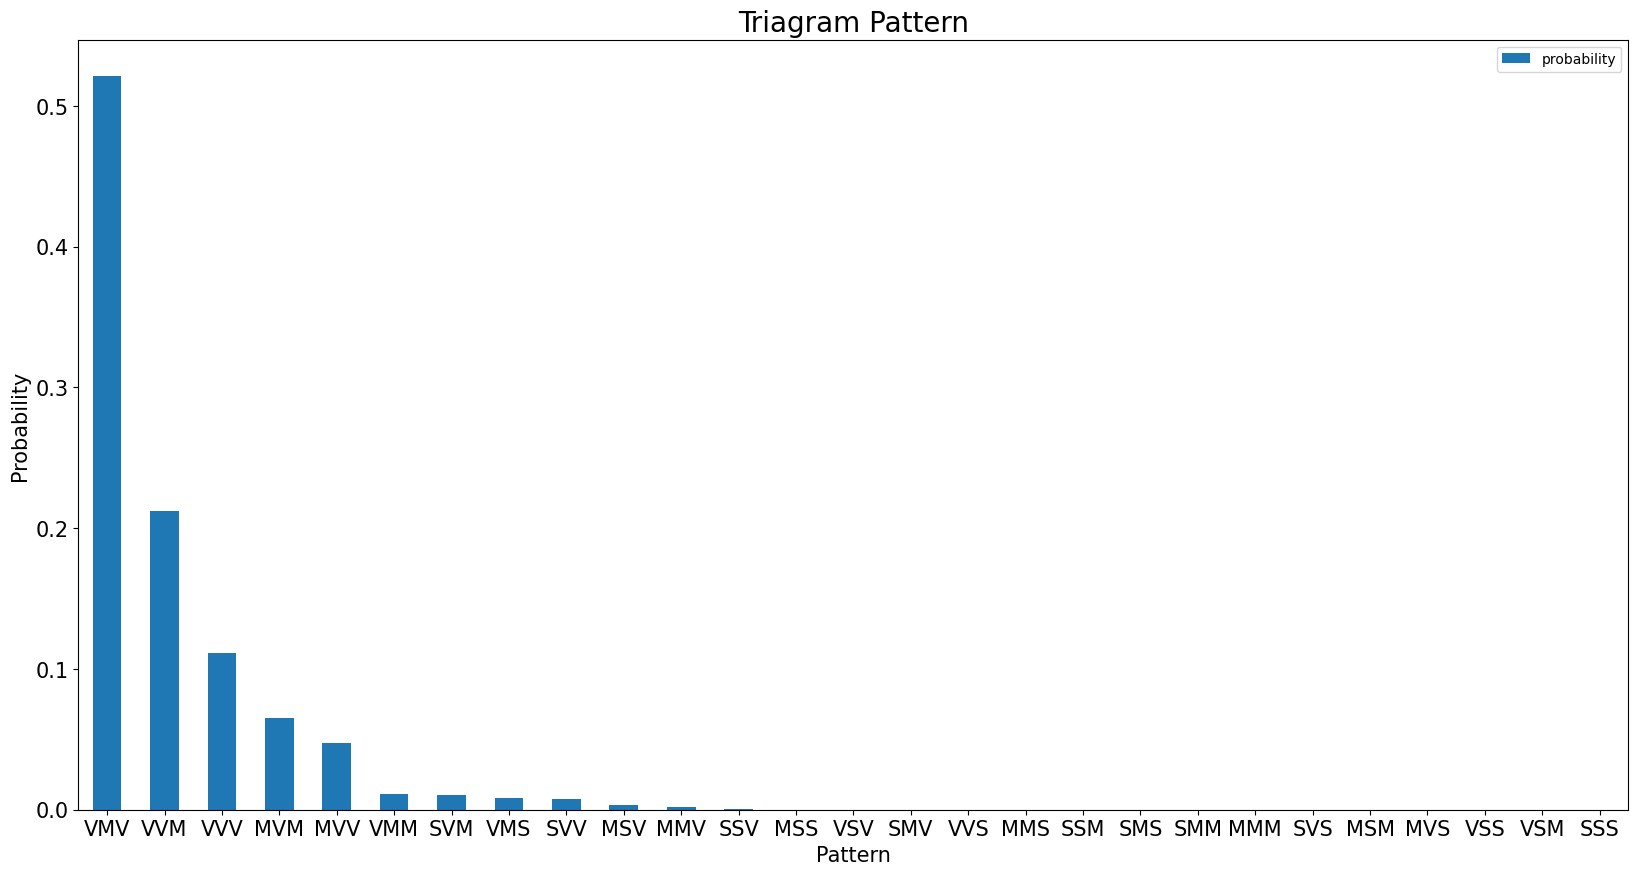

In [27]:
df_triagram_pattern.sort_values(by=['frequency'], inplace=True, ascending=False)

plt.figure(figsize=(20,10))
df_triagram_pattern.plot.bar(x='pattern', y='probability', rot=0, figsize=(20,10), fontsize=15)
plt.title('Triagram Pattern',fontsize=20)
plt.xlabel('Pattern',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.savefig(f'{filename}/TriagramPattern.png')

In [28]:
df_words = pd.DataFrame(columns=['word','frequency'])

for word in words:
    InsertOrIncrease(df_words, 'word',word)
    


In [29]:
df_words.sort_values(by=['frequency'], inplace=True, ascending=False)
generateCSV(df_words, f'{filename}/words.csv')

df_top20_words = df_words.head(20)

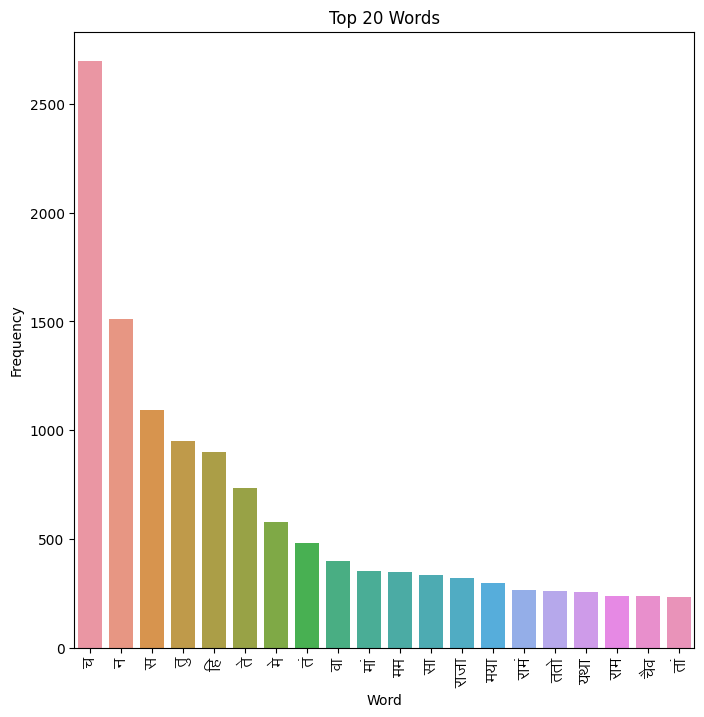

In [30]:
plt.figure(figsize=(8,8))
ax=plt.axes()

sns.barplot(x='word', y='frequency', data=df_top20_words)
plt.title('Top 20 Words')

plt.xlabel('Word')
plt.ylabel('Frequency')

wordsList = df_top20_words['word'].tolist()

xLabelsList = []

for word in wordsList:
    mappedWord = ""
    for letter in word:
        if letter in mk.Vyanjanmap:
            mappedWord += mk.Vyanjanmap[letter]
        elif letter in mk.SwarMap:
            mappedWord += mk.SwarMap[letter]
        elif letter in mk.MatraMap:
            if letter=='ि':
                last = mappedWord[-1]
                mappedWord = mappedWord[:-1] + mk.MatraMap[letter]+last
            else:
                mappedWord += mk.MatraMap[letter]
    # print(f'Actual letter is {word} and mapped letter is {mappedWord}')
    xLabelsList.append(mappedWord)

font_path = "KrutiDev-010.TTF"
prop = mfm.FontProperties(fname=font_path)
ax.set_xticklabels(xLabelsList, fontproperties=prop, fontsize=15,rotation=90)
plt.savefig(f'{filename}/top20_words.png')

plt.show()


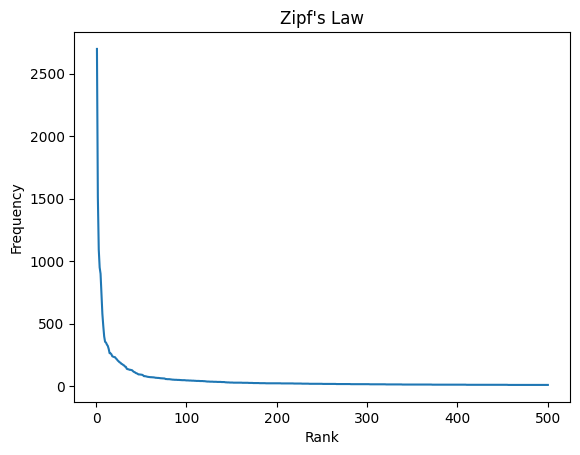

In [31]:
df_sample_words = df_words.head(500)

rank = np.array(range(1,len(df_sample_words)+1))

plt.figure()
plt.plot(rank, df_sample_words['frequency'])
plt.title('Zipf\'s Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.savefig(f'{filename}/Zipf.png')
plt.show()


In [3]:
df_words = pd.read_csv('./ZipfsGraph/sanskrit_words.csv')

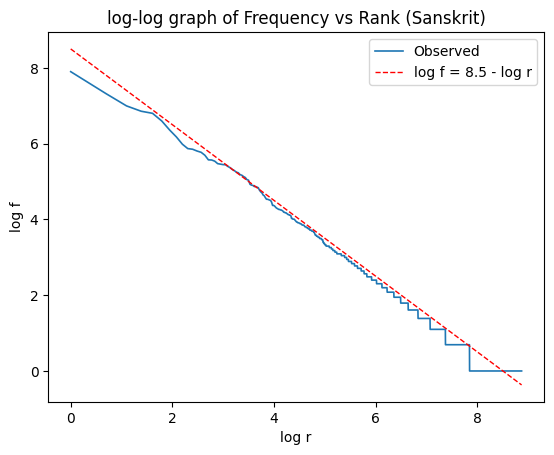

In [5]:
df_sample_words = df_words

rank = np.array(range(1,len(df_sample_words)+1))
# plot log-log graph of frequency vs rank
plt.figure()
ax=plt.axes()
xlog = np.log(rank)
ylog = np.log(df_sample_words['frequency'])

plt.title('log-log graph of Frequency vs Rank (Sanskrit)')

plt.xlabel('log r')
plt.ylabel('log f')
plt.plot(xlog, ylog,  linestyle='-', linewidth=1.2, label='Observed')
plt.plot(xlog, 8.5+xlog*-1, color='red', linestyle='--', linewidth=1, label='log f = 8.5 - log r')
plt.legend()
# plt.savefig(f'{filename}/frequency_vs_rank.png')

plt.show()

All Character Analysis:

In [33]:
Vyanjandf = {}
Swardf = {}
Matradf = {}

emptVyanjanCol = np.array(sc.vyanjans)
emptSwarCol = np.array(sc.swars)
emptMatraCol = np.array(sc.matras)

df_emptyVyanjan = pd.DataFrame()
df_emptyMatra = pd.DataFrame()
df_emptySwar = pd.DataFrame()

df_emptyVyanjan['vyanjan'] = emptVyanjanCol
df_emptyVyanjan['frequency'] = np.zeros(len(emptVyanjanCol),dtype=float)

df_emptyMatra['matra'] = emptMatraCol
df_emptyMatra['frequency'] = np.zeros(len(emptMatraCol),dtype=float)

df_emptySwar['swar'] = emptSwarCol
df_emptySwar['frequency'] = np.zeros(len(emptSwarCol),dtype=float)


for i in range(len(sc.vyanjans)):
    Vyanjandf[sc.vyanjans[i]] = [df_emptyVyanjan.copy(),df_emptyMatra.copy(),df_emptySwar.copy()]
        
with open(f'{filename}.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            if word[i] in sc.vyanjans and i+1!=len(word):

                if word[i+1] in sc.vyanjans:
                    Vyanjandf[word[i]][0].loc[Vyanjandf[word[i]][0]['vyanjan'] == word[i+1], 'frequency'] += 1
                elif word[i+1] in sc.matras:
                    Vyanjandf[word[i]][1].loc[Vyanjandf[word[i]][1]['matra'] == word[i+1], 'frequency'] += 1
                elif word[i+1] in sc.swars:
                    Vyanjandf[word[i]][2].loc[Vyanjandf[word[i]][2]['swar'] == word[i+1], 'frequency'] += 1



Number of words: 129060


In [34]:
np.save('VyanjanDict.npy', Vyanjandf, allow_pickle=True)

# # Load
# read_dictionary = np.load('VyanjanDict.npy',allow_pickle='TRUE').item()

# print(read_dictionary['ब'][0])

Generate bar graph for next vyanjans

In [ ]:
for i in range(len(sc.vyanjans)):
    generateCSV_filePath(Vyanjandf[sc.vyanjans[i]][0],f'vyanjanChart{i}.csv',f'{filename}/data/{sc.vyanjans[i]}/')
    PlotBarGraph_filePath(Vyanjandf[sc.vyanjans[i]][0],'vyanjan',f'/data/{sc.vyanjans[i]}/',sc.vyanjans[i],'vyanjan')
    

Generate bar graph for next matras

In [ ]:
for i in range(len(sc.vyanjans)):
    generateCSV_filePath(Vyanjandf[sc.vyanjans[i]][1],f'matraChart{i}.csv',f'{filename}/data/{sc.vyanjans[i]}/')
    PlotBarGraph_filePath(Vyanjandf[sc.vyanjans[i]][1],'matra',f'/data/{sc.vyanjans[i]}/',sc.vyanjans[i],'matra')

In [37]:
df=pd.DataFrame()

df=pd.read_csv("Ramayana/aranyakanda/trigrams_vyanjan.csv")

# change the 1st column values 

for i in df.iloc[:,0]:
    text=""
    textList=[]
    for j in i:
        if j in mk.Vyanjanmap:
            text=text+mk.Vyanjanmap[j]
            textList.append(mk.Vyanjanmap[j])
        elif j in mk.SwarMap:
            text=text+mk.SwarMap[j]
            textList.append(mk.SwarMap[j])
        elif j in mk.MatraMap:
            if j=='ि':
                text=text+mk.MatraMap[j]
                textList.insert(-1,mk.MatraMap[j])
            else:
                text=text+mk.MatraMap[j]
                textList.append(mk.MatraMap[j])
    # print(f'For {i} the text is {text} and textList is {textList}')
    text1 = ''.join(textList)
    # print(f'For {i} the text is {text} and text1 is {text1}')
    df.replace(i,text1,inplace=True)
# print(df.head())

freq = [tuple(x) for x in df.values]

wordcloud = WordCloud(font_path='KrutiDev-010.TTF',width = 800, height = 800,background_color ='white').generate_from_frequencies(dict(freq))

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig(f'{filename}/WordCloud.png')
plt.show()

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [ ]:
print(Vyanjandf)

{'क': [   vyanjan  frequency  probability
0        क   92.00000      0.01784
1        ख    0.00000      0.00000
2        ग   19.00000      0.00368
3        घ    1.00000      0.00019
4        ङ   12.00000      0.00233
5        च  168.00000      0.03258
6        छ    0.00000      0.00000
7        ज   30.00000      0.00582
8        झ    0.00000      0.00000
9        ञ   16.00000      0.00310
10       ट   43.00000      0.00834
11       ठ    4.00000      0.00078
12       ड    0.00000      0.00000
13       ढ    0.00000      0.00000
14       ण   81.00000      0.01571
15       त   46.00000      0.00892
16       थ  432.00000      0.08377
17       द   96.00000      0.01862
18       ध    7.00000      0.00136
19       न  222.00000      0.04305
20       प  509.00000      0.09870
21       फ    0.00000      0.00000
22       ब   35.00000      0.00679
23       भ   17.00000      0.00330
24       म  406.00000      0.07873
25       य  107.00000      0.02075
26       र 1641.00000      0.31821
27       ल  3

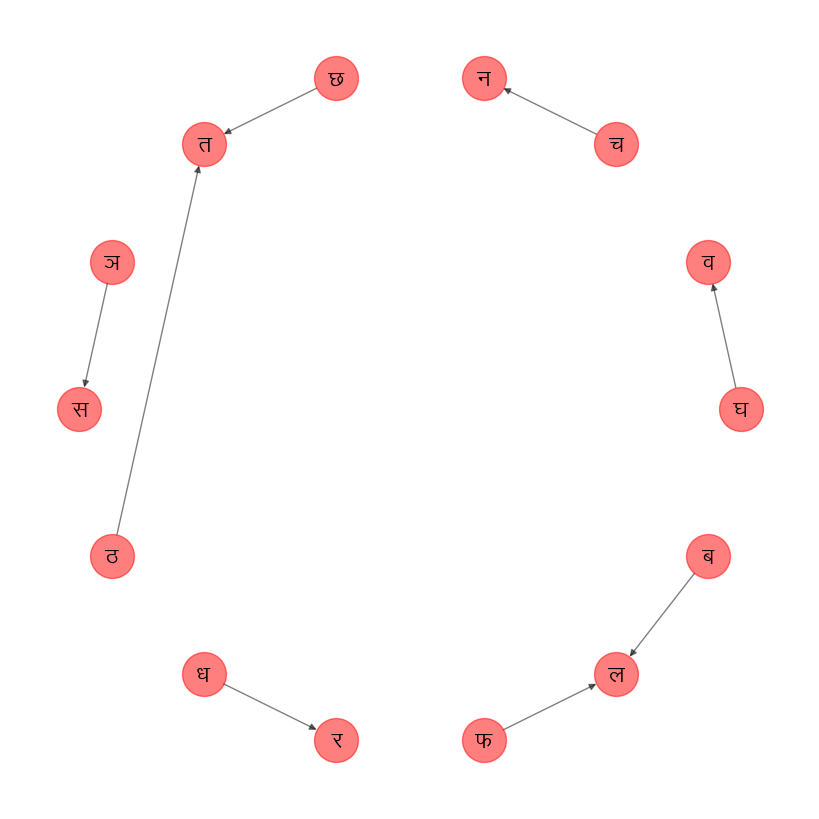

In [ ]:
# create graph from word frequency tuples

G = nx.DiGraph()


for i in Vyanjandf:
    for j in Vyanjandf[i][0].values:
        if j[2]>0.33 and j[1]>50:
            G.add_edge(mk.Vyanjanmap[i],mk.Vyanjanmap[j[0]],weight=j[2])
            # print(f'Edge added between {mk.Vyanjanmap[i]} and {mk.Vyanjanmap[j[0]]} with weight {j[1]}')

# draw graph in kamael layout
plt.figure(figsize=(8,8))

nx.draw_circular(G, with_labels=False, font_size=10, node_size=1000, node_color='red', edge_color='black', width=1, alpha=0.5, arrows=True)
nodePos = nx.circular_layout(G)

# Write text at these node Positions
font_path = "KrutiDev-010.TTF"
prop = mfm.FontProperties(fname=font_path)

for key, value in nodePos.items():
    plt.text(value[0], value[1], key, fontsize=20, fontproperties=prop, horizontalalignment='center', verticalalignment='center')
    
plt.show()




In [ ]:
df_triagrams_positions = pd.DataFrame(columns=['position', 'frequency'])


with open(filename+'.txt',encoding='utf-8') as f:
    sentence=f.read()
    # print(sentence)
    words = sentence.split()
    
    for word in df_triagrams.triagram:

        curr = ""

        for i in word:

            if i in sc.vyanjans:
                curr += "V"

            if i in sc.swars:
                curr += "S"
            
            if i in sc.matras:
                curr += "M"    
            
        if len(curr) ==3 :
            InsertOrIncrease(df_triagrams_positions, 'position', curr)
        

df_triagrams_positions = df_triagrams_positions.sort_values(by=['frequency'],ascending = False)


generateCSV(df_triagrams_positions, f'{filename}/triagrams_positions.csv')